In [6]:
from google.colab import drive
drive.mount("/content/gdrive")
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from webcolors import rgb_to_name

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import urllib.request
url = 'https://github.com/klaverhenrik/Deep-Learing-for-Visual-Recognition-2022/tree/main/data/cat.jpg' # Definint url to img
urllib.request.urlretrieve(url, '/content/gdrive/My Drive/cat.jpg') # retrieving and saving images to defined path
!ls '/content/gdrive/My Drive/cat.jpg' # ensuring img is on saved path


'/content/gdrive/My Drive/cat.jpg'


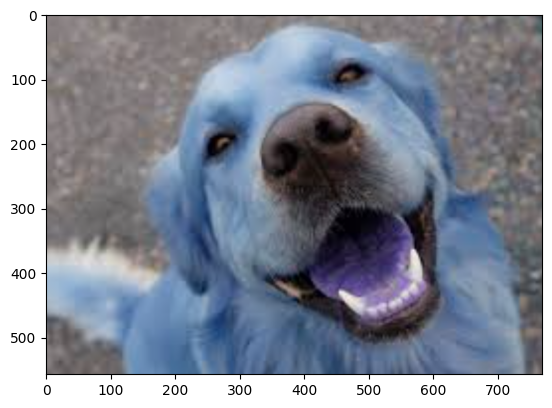

In [9]:
# Read image using OpenCV
#img = <your code goes here>

# Display image using Matplotlib
img_path = '/content/gdrive/My Drive/dog.png'
#print('img_path', img_path)
read_img = cv.imread(img_path)
#print(read_img)
plt.imshow(read_img)
plt.show()

image size is  (557, 769)
image shape is  (557, 769, 3)


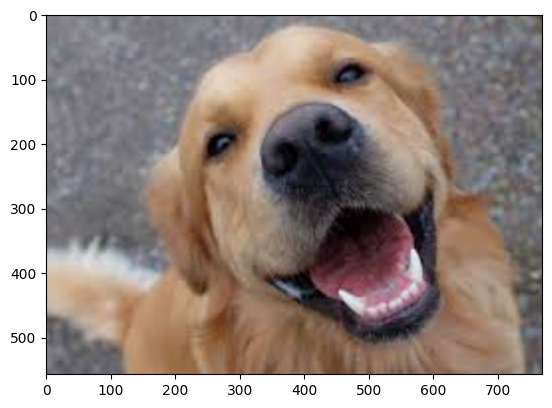

In [10]:

#What is the size of the image?
# A: to determine this we have to acquire the shape and size of the image this can be done in a variaty of ways two are presented below
size = read_img.shape[:2]
print("image size is ", size)

#How many color channels does it have?
shape = read_img.shape
# width, height, channels = read_img.shape
print("image shape is ", shape)
# A: based on the output of the shape function where the last number fromt he left determines the number of channels  we can see that the number of channels are 3 and thereby it is a RGB image

#Why do the colors look so weird?
 # A: OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front. The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.

RGB_img = cv.cvtColor(read_img, cv.COLOR_BGR2RGB)
#print(read_img)
plt.imshow(RGB_img)
plt.show()

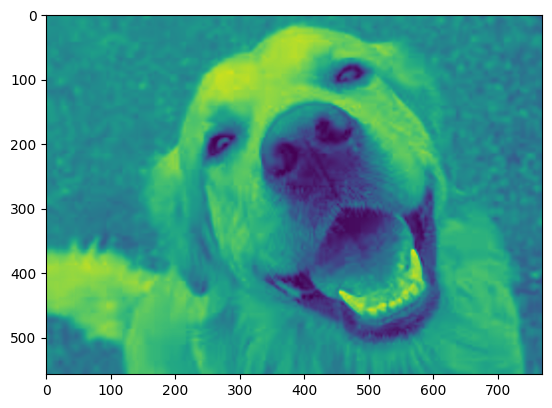

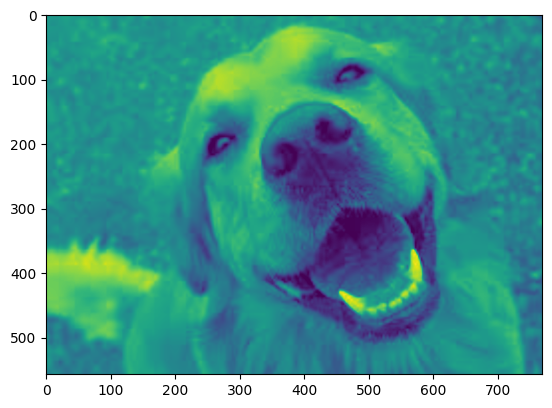

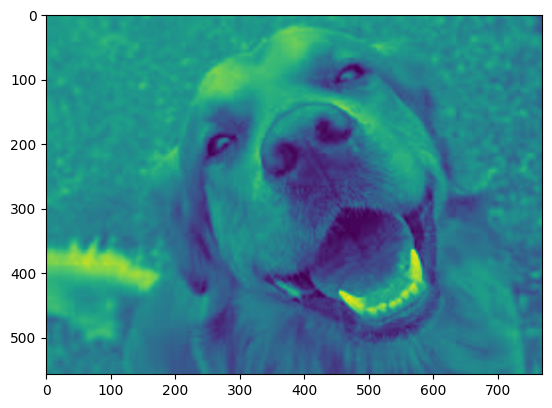

In [11]:
r, g, b = cv.split(RGB_img) # Three channels in image are split in to red, green and blue color pallet
merged = cv.merge((r, g, b))

plt.imshow(r)
plt.show()
plt.imshow(g)
plt.show()
plt.imshow(b)
plt.show()

# What just happened?
# Three channels in image are split in to red, green and blue colors which are the three base colors which all other color consist of and then merged once again.- By splitting the color we remove some information which the colors providing. fx the red is removed which only leaves the other to represent te image which the gets a different expression

color of pixel at location (100, 100) [255 255 255]


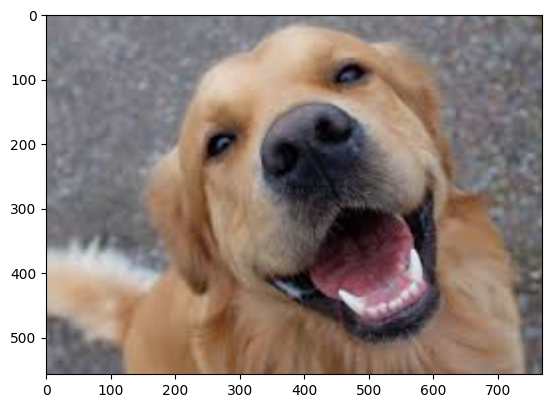

color of pixel at location (100, 100) after changing pixel [255 255 255]


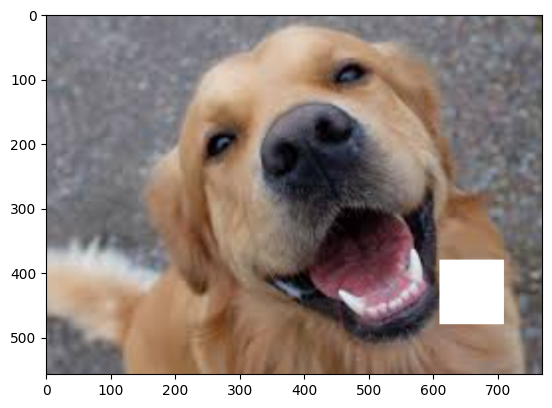

color of pixel at location (100, 100) after changing pixel [255 255 255]


In [ ]:
# What is the color [b,g,r] of the pixel at location [100,100]?
#<your code goes here>

color = RGB_img[100][100]

print('color of pixel at location (100, 100)', color) # gives rgb out so we convert this

#named_color = rgb_to_name((128, 127, 134))
#print(named_color)
# Set the color the pixel at location [100,100] to the value color = RGB_img[100][100]

RGB_img[100][100] = np.array([255, 255, 255])
color = RGB_img[100][100]
plt.imshow(RGB_img)
plt.show()

print('color of pixel at location (100, 100) after changing pixel', color) # gives rgb out so we convert this
# Make the color of all pixels in the region [380:480, 710:810] white'


print('color of pixel at location (100, 100) after changing pixel', color) # gives rgb out so we convert this
# Make the color of all pixels in the region [380:480, 710:810] white'
RGB_img[380:480,610:710] = np.array([255, 255, 255])
'''
for i in range(380, 480):
  for j in range(610,710):
    ''
'''



# Display


plt.imshow(RGB_img)
plt.show()


#Where is the origin of the image coordinate system?
#  A: the origin of th image coordinate system is in the upper left corner at (0,0)
#What is the direction of the first coordinate/axis?
# A: the direction of the first coordinate axix is downwards along the y-axis
#What is the direction of the second coordinate/axis?
# A: The second direction is accross the x axiss horizontally
#Oh, and what does the function cv2.cvtColor do?
 # A: method is used to convert an image from one color space to another

(557, 769)


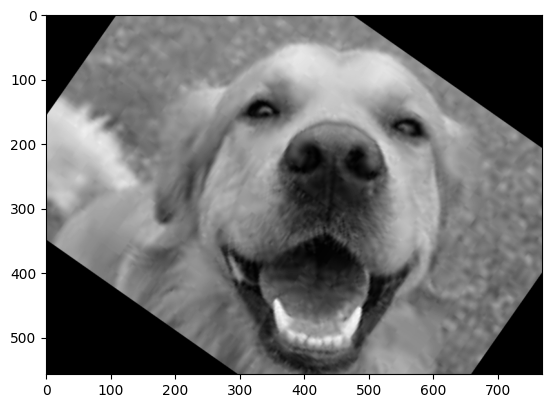

In [ ]:
 # Task 2
img = cv.imread(img_path)


# Convert to grayscale
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print(img.shape)
# Resize img to size 100 by 100
resized_img = cv.resize(img, (100,100))
#img = <your code goes here>
rows,cols= img.shape
# Now, rotate the resized image 35 degrees counter clockwise

M = cv.getRotationMatrix2D((cols/2,rows/2),-35,1)

rotate_35 = cv.warpAffine(img,M,(cols,rows))

plt.imshow(rotate_35, cmap='gray')
plt.show()
#rotated_img = cv.rotate(resized_img, )

#How would you use cv2.resize to scale the image to half the original size?
#What do you think the matrix M does? Hint: See here
#What happens if you delete cmap='gray' in plt.imshow?

'/content/gdrive/My Drive/sudoku.jpg'


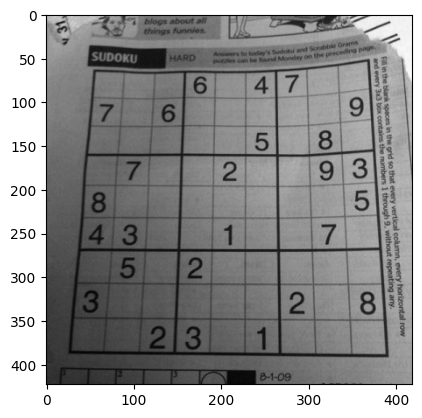

In [ ]:
import urllib.request

url = "https://github.com/klaverhenrik/Deep-Learing-for-Visual-Recognition-2022/raw/main/data/sudoku.jpg"
urllib.request.urlretrieve(url,'/content/gdrive/My Drive/sudoku.jpg')

# Check that the file is in your Drive
!ls "/content/gdrive/My Drive/sudoku.jpg"



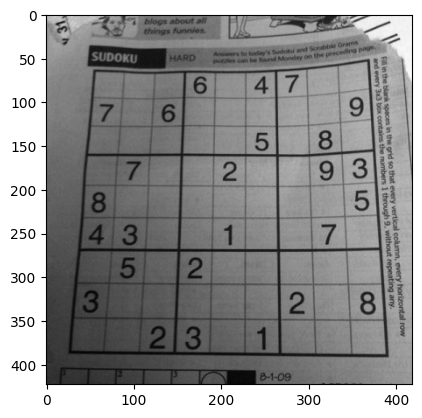

In [ ]:
# Load sudoku image
img = cv2.imread('/content/gdrive/My Drive/sudoku.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

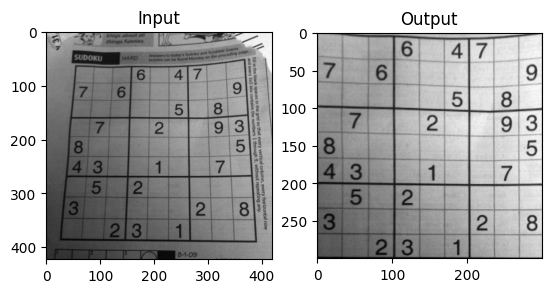

In [ ]:
width,height = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

img_aligned = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(img_aligned,cmap='gray'),plt.title('Output')


#Can you figure out how the coordinates pts1 were selected?
#What does the transform warpPerspective do?
# A: warpPerspective() function that applies the perspective transformation to an image. The syntax of this function is given below.Applies a perspective transformation to an image. The function warpPerspective transforms the source image using the specified matrix: